In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
data_demo = pd.read_csv('../../data/weights_heights.csv')

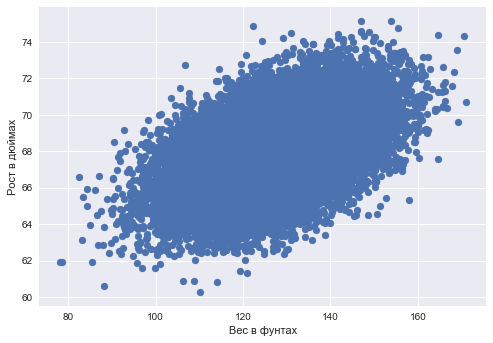

In [3]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Вес в фунтах')
plt.ylabel('Рост в дюймах');

In [4]:
df = pd.read_csv('../../data/bank_train.csv')
labels = pd.read_csv('../../data/bank_train_target.csv', header=None)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files

import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
label_encoder = LabelEncoder()

{0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate', 5: 'professional.course', 6: 'university.degree', 7: 'unknown'}


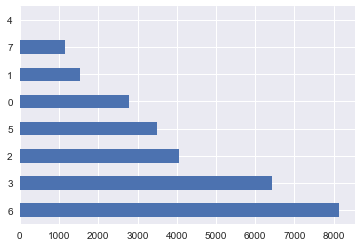

In [7]:
mapped_education = pd.Series(label_encoder.fit_transform(df['education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [8]:
try:
    label_encoder.transform(df['education'].replace('high.school', 'high_school'))
except Exception as e:
    print('Error:', e)

Error: y contains new labels: ['high_school']


In [9]:
df['education'] = mapped_education
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,3,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,6,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,0,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,6,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,6,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [10]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['education'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,8,2,3,0,0,0,1,4,1,901,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
1,46,0,1,6,0,2,0,0,1,3,208,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1
2,49,1,1,0,1,2,2,1,4,3,131,5,999,0,1,1.4,94.465,-41.8,4.864,5228.1
3,31,9,1,6,0,0,0,0,3,3,404,1,999,0,1,-2.9,92.469,-33.6,1.044,5076.2
4,42,3,1,6,0,2,0,1,7,1,85,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


In [11]:
print(dict(enumerate(label_encoder.classes_)))

{0: 'failure', 1: 'nonexistent', 2: 'success'}


In [12]:
labels

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [14]:
df.shape

(27595, 20)

In [15]:
def logistic_regression_accuracy_on(dataframe, labels):
    features = dataframe.as_matrix()
    train_features, test_features, train_labels, test_labels = \
        train_test_split(features, labels)

    logit = LogisticRegression()
    logit.fit(train_features, train_labels)
    return classification_report(test_labels, logit.predict(test_features))

print(logistic_regression_accuracy_on(df[categorical_columns], labels))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      6118
          1       0.00      0.00      0.00       781

avg / total       0.79      0.89      0.83      6899



In [16]:
onehot_encoder = OneHotEncoder(sparse=False)

In [17]:
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
print(logistic_regression_accuracy_on(encoded_categorical_columns, labels))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      6159
          1       0.64      0.17      0.27       740

avg / total       0.88      0.90      0.87      6899



In [19]:
assert hash('no') == hash('no')
assert hash('housing=no') != hash('loan=no')

In [23]:
%pwd

'C:\\Users\\Eugene\\Documents\\GitHub\\mlcourse_open\\jupyter_notebooks\\topic8_sgd_hashing_vowpal_wabbit'

In [35]:
with open('../../data/news_data/20news_test_predictions.txt') as pred_file:
    test_prediction = [float(label) 
                             for label in pred_file.readlines()]

auc = roc_auc_score(test_labels, test_prediction)
roc_curve = roc_curve(test_labels, test_prediction)

with plt.xkcd():
    plt.plot(roc_curve[0], roc_curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

TypeError: 'tuple' object is not callable

In [28]:
newsgroups = fetch_20newsgroups('../../data/news_data')
all_documents = newsgroups['data']
all_targets = [1 if newsgroups['target_names'][target] == 'rec.autos' 
               else -1 for target in newsgroups['target']]
train_documents, test_documents, train_labels, test_labels = \
    train_test_split(all_documents, all_targets, random_state=7)

In [30]:
len(test_labels)

2829

In [36]:
all_documents = newsgroups['data']
topic_encoder = LabelEncoder()
all_targets_mult = topic_encoder.fit_transform(newsgroups['target']) + 1

In [37]:
train_documents, test_documents, train_labels_mult, test_labels_mult = \
    train_test_split(all_documents, all_targets_mult, random_state=7)

In [42]:
def to_vw_format(document, label=None):
    return str(label or '') + ' |text ' + ' '.join(re.findall('\w{3,}', document.lower())) + '\n'


In [40]:
train_labels_mult.shape

(8485,)

In [ ]:
#with open('../../data/news_data/20news_train_mult.vw', 'w') as vw_train_data:
#    for text, target in zip(train_documents, train_labels_mult):
#        vw_train_data.write(to_vw_format(text, target))
#with open('../../data/news_data/20news_test_mult.vw', 'w') as vw_test_data:
#    for text in test_documents:
#        vw_test_data.write(to_vw_format(text))

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

In [2]:
%%python

UsageError: %%python is a cell magic, but the cell body is empty.


In [3]:
%clear

In [5]:
%%cmdpath

ERROR:root:Cell magic `%%cmdpath` not found.


In [7]:
!dir

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг OS
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : B686-D74B

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\Eugene\Documents\GitHub\mlcourse_open\jupyter_notebooks\topic8_sgd_hashing_vowpal_wabbit

24.04.2017  23:05    <DIR>          .
24.04.2017  23:05    <DIR>          ..
23.04.2017  16:16    <DIR>          .ipynb_checkpoints
23.04.2017  16:16            71я363 hw8_part1_implement_sgd.ipynb
23.04.2017  12:46            17я078 hw8_part2_vw_stackoverflow_tags_10mln.ipynb
23.04.2017  22:30           230я961 topic8_sgd_hashing_vowpal_wabbit.ipynb
24.04.2017  23:05            98я942 Untitled.ipynb
               4 д ©«®ў        418я344 Ў ©в
               3 Ї Ї®Є   2я377я023я488 Ў ©в бў®Ў®¤­®


In [ ]:
!panda list